In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('dataset.csv')

In [46]:
df.sample(5, random_state=0)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
9394,741998,The Binding,"Horror,Thriller,Drama",it,While visiting her fiancé's mother in southern...,37.331,2020-10-02,5.4,205
898,28580,The Lost Weekend,Drama,en,"Don Birnam, a long-time alcoholic, has been so...",9.795,1945-11-29,7.7,436
2398,20283,Breaking Away,"Drama,Comedy",en,"Dave, nineteen, has just graduated high school...",5.695,1979-05-24,7.2,201
5906,82654,Warm Bodies,"Horror,Comedy,Romance",en,After a zombie becomes involved with the girlf...,35.676,2013-01-31,6.4,5444
2343,11951,Vanishing Point,"Action,Drama",en,"Kowalski works for a car delivery service, and...",10.332,1971-01-15,7.2,343


In [47]:
df.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [49]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [50]:
df.groupby('original_language')['popularity'].agg(['count', 'mean']).sort_values('count' , ascending=False)

,count,mean
original_language,,
en,7810,38.613299
fr,680,12.616541
it,434,8.606516
ja,275,58.626069
es,195,30.740728
de,104,11.713173
ko,76,27.354684
zh,54,24.998574
cn,54,18.082630


In [58]:
df.groupby('original_language')['vote_average'].agg(['count', 'mean']).sort_values('count' , ascending=False)

,count,mean
original_language,,
en,7810,6.544469
fr,680,6.628676
it,434,6.640323
ja,275,7.332000
es,195,6.930256
de,104,7.083654
ko,76,7.442105
zh,54,7.062963
cn,54,6.996296


<Axes: >

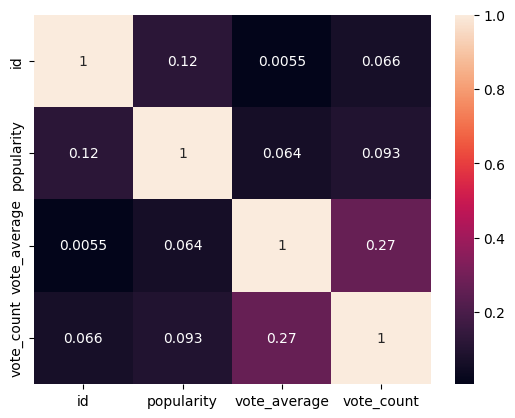

In [52]:
sns.heatmap(df.select_dtypes(include='number').corr().abs(), annot=True)

In [53]:
df[df['genre'].isnull() | df['overview'].isnull()][['id','genre','overview']]

,id,genre,overview
3361,50472,NaN,"A queue at the ATM machine, a displaced family..."
4150,38537,Comedy,NaN
6973,31359,Comedy,NaN
7821,43211,NaN,Two not very clever young doctors open a fitne...
7941,2029,Comedy,NaN
8518,57114,NaN,NaN
9293,17413,Comedy,NaN
9440,516043,Comedy,NaN
9620,154512,Comedy,NaN
9792,42426,"Comedy,Fantasy",NaN


In [54]:
# Remplacer les valeurs manquantes dans 'genre' par "Unknown"
df['genre'].fillna('Unknown', inplace=True)

# Remplacer les valeurs manquantes dans 'overview' par "No overview available"
df['overview'].fillna('No overview available', inplace=True)

In [55]:
df[df['genre'].isnull() | df['overview'].isnull()][['genre','overview']]

,genre,overview


In [62]:
#check if the values are changed
print(df.loc[df['id'] == 244514]['overview'])
print(df.loc[df['id'] == 57114]['genre'])


9989    No overview available
Name: overview, dtype: object
8518    Unknown
Name: genre, dtype: object


In [85]:
#Now to define the model we should create one feature and Combine 'overview' and 'genre' into a single string for each movie
df['combined_text'] = df['overview'] + ' ' + df['genre']


In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [92]:
# Initialize CountVectorizer to convert text to vectors
vectorizer = CountVectorizer(stop_words='english')
combined_matrix = vectorizer.fit_transform(df['combined_text'])


In [93]:
# Calculate cosine similarity between combined text
cosine_sim_combined = cosine_similarity(combined_matrix, combined_matrix)

In [97]:
# Function to recommend similar movies based on cosine similarity
def recommend_similar_movies(movie_title, num_recommendations=5):
    movie_index = df[df['title'] == movie_title].index[0]
    similar_movies = list(enumerate(cosine_sim_combined[movie_index]))
    sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)
    top_similar_movies = sorted_similar_movies[1:num_recommendations + 1]
    recommended_movie_indices = [index for index, _ in top_similar_movies]
    return df.iloc[recommended_movie_indices]

In [98]:
# Example: Recommend similar movies for a given movie title
movie_title = 'The Godfather'
recommended_movies = recommend_similar_movies(movie_title)
print("Recommended movies similar to '{}':".format(movie_title))
print(recommended_movies['title'])

Recommended movies similar to 'The Godfather':
4       The Godfather: Part II
7419                Blood Ties
153                      Joker
2624                 Bomb City
9520                     Gotti
Name: title, dtype: object
